In [30]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('seaborn')

In [31]:
c30 = pd.read_csv('c30.csv')
c60 = pd.read_csv('c60.csv')
c120 = pd.read_csv('c120.csv')

c1_0 = pd.read_csv('c1.csv')
c2_5 = pd.read_csv('c2.5.csv')
c5_0 = pd.read_csv('c5.csv')

In [32]:
df = c30.drop(columns=['Unnamed: 0', 'Coal_Carbon', 'Nuclear_Carbon', 'Wind_Carbon', 'Gas_Carbon'])
df = df.rename(columns={"Total Carbon Dioxide" : "c30"})
df['c60'] = c60["Total Carbon Dioxide"]
df['c120'] = c120["Total Carbon Dioxide"]
df['c1_0'] = c1_0["Total Carbon Dioxide"]
df['c2_5'] = c2_5["Total Carbon Dioxide"]
df['c5_0'] = c5_0["Total Carbon Dioxide"]
df.head()

,Ticks,c30,c60,c120,c1_0,c2_5,c5_0
0,1,133.160178,154.315674,123.870362,121.029623,121.029623,121.029623
1,2,133.160178,154.315674,123.870362,89.094692,89.094692,89.094692
2,3,133.160178,154.315674,123.870362,89.094692,89.094692,89.094692
3,4,133.159757,154.331907,123.885894,89.110223,89.110223,89.110223
4,5,130.756948,154.331907,121.483085,89.125028,89.125028,89.125028


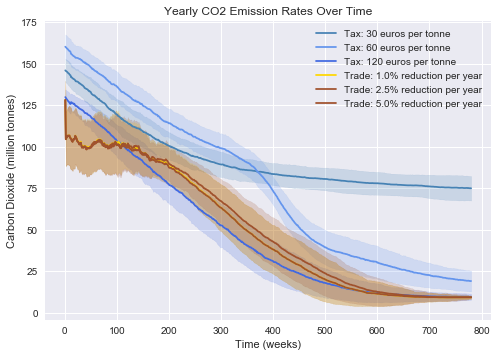

In [33]:

ax1 = sns.lineplot(x="Ticks", y="c30", data=df, ci='sd', label="Tax: 30 euros per tonne", color="steelblue")
ax2 = sns.lineplot(x="Ticks", y="c60", data=df, ci='sd', label="Tax: 60 euros per tonne", color="cornflowerblue")
ax3 = sns.lineplot(x="Ticks", y="c120", data=df, ci='sd', label="Tax: 120 euros per tonne", color="royalblue")

ax4 = sns.lineplot(x="Ticks", y="c1_0", data = df, ci='sd', label="Trade: 1.0% reduction per year", color="gold")
ax5 = sns.lineplot(x="Ticks", y="c2_5", data = df, ci='sd', label="Trade: 2.5% reduction per year", color="sienna")
ax6 = sns.lineplot(x="Ticks", y="c5_0", data = df, ci='sd', label="Trade: 5.0% reduction per year", color="sienna")
ax6.set(xlabel="Time (weeks)", ylabel="Carbon Dioxide (million tonnes)", title="Yearly CO2 Emission Rates Over Time")
plt.show()

In [34]:
import pingouin as pgn

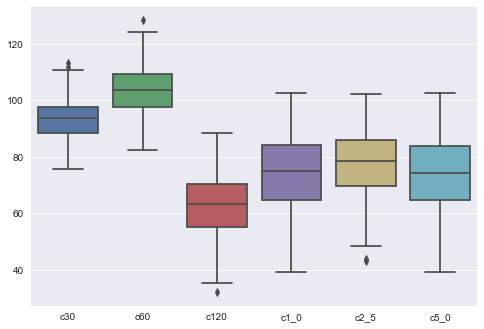

In [35]:
five_year    = df.loc[df['Ticks'] == 260].drop(['Ticks'], axis=1)
ten_year     = df.loc[df['Ticks'] == 520].drop(['Ticks'], axis=1)
fifteen_year = df.loc[df['Ticks'] == 780].drop(['Ticks'], axis=1)

ax = sns.boxplot(data=five_year)
# ax = sns.swarmplot(data=five_year)

In [36]:
# pgn.rm_anova(five_year)

pgn.rm_anova(data=ten_year)

,Source,ddof1,ddof2,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Within,5,500,1324.089252,1.109140e-285,8.995120e-151,0.92978,0.522683,False,0.000192,9.078876e-170
